<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Сиды надо зафиксировать для того, чтобы результаты выполнения кода были воспроизводимы (многие методы, которые применяются в EDA и ML, используют генератор рандомных чисел для инициализации)

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [181]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [182]:
# Отобразим 10 случайных строк тренировочного датасета

df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [183]:
# Отобразим первые 5 и последние 5 объектов тестового датасета
pd.concat([df_test.head(), df_test.tail()])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [184]:
# Посмотрим, есть ли в тренировочном датасете пропуски и в каких они колонках, если есть

print(*[f'В столбце "{k}" находится {v} пропущенных значений' for k, v in df_train.isna().sum().to_dict().items() if v != 0], sep='\n')

В столбце "mileage" находится 202 пропущенных значений
В столбце "engine" находится 202 пропущенных значений
В столбце "max_power" находится 196 пропущенных значений
В столбце "torque" находится 203 пропущенных значений
В столбце "seats" находится 202 пропущенных значений


In [185]:
# Посмотрим, есть ли в тестовом датасете пропуски и в каких они колонках, если есть

print(*[f'В столбце "{k}" находится {v} пропущенных значений' for k, v in df_test.isna().sum().to_dict().items() if v != 0], sep='\n')

В столбце "mileage" находится 19 пропущенных значений
В столбце "engine" находится 19 пропущенных значений
В столбце "max_power" находится 19 пропущенных значений
В столбце "torque" находится 19 пропущенных значений
В столбце "seats" находится 19 пропущенных значений


In [186]:
# Посмотрим, есть ли в тренировочных данных явные дубликаты

df_train[df_train.duplicated() == True]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [187]:
# Посмотрим, есть ли в тестовых данных явные дубликаты

df_test[df_test.duplicated() == True]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
200,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
235,Hyundai Grand i10 1.2 CRDi Sportz,2017,450000,56290,Diesel,Dealer,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0
238,Toyota Camry 2.5 Hybrid,2016,2000000,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
253,Tata Safari Storme EX,2015,503000,110000,Diesel,Individual,Manual,First Owner,14.1 kmpl,2179 CC,147.94 bhp,320Nm@ 1500-3000rpm,7.0
269,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
936,BMW X4 M Sport X xDrive20d,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
949,Toyota Camry 2.5 Hybrid,2016,2000000,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
971,Maruti Ertiga SHVS ZDI Plus,2017,750000,50000,Diesel,Individual,Manual,First Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [188]:
# Заполним пропуски в данных медианами соответствующих столбцов из тренировочного датасета
# Перед заполнением пропусков предобработаем столбцы так, как написано ниже, а столбец "torque" удалим  

df_train.drop('torque', axis='columns', inplace=True)
df_test.drop('torque', axis='columns', inplace=True)

df_train['mileage'] = df_train['mileage'].apply(lambda x: float(str(x).split()[0]))
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(str(x).split()[0]))

df_train['engine'] = df_train['engine'].apply(lambda x: float(str(x).split()[0]))
df_test['engine'] = df_test['engine'].apply(lambda x: float(str(x).split()[0]))

df_train['max_power'] = df_train['max_power'].apply(lambda x: float(str(x).split()[0]) if x != ' bhp' else np.nan)
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(str(x).split()[0]) if x != ' bhp' else np.nan)

na_fillers = {'mileage': df_train['mileage'].median(), 'engine': df_train['engine'].median(), 
              'max_power': df_train['max_power'].median(), 'seats': df_train['seats'].median()}

df_train.fillna(value=na_fillers, inplace=True)
df_test.fillna(value=na_fillers, inplace=True)

In [189]:
# Проверка, что пропусков не осталось
[print(f'В столбце "{k}" находится {v} пропущенных значений') for k, v in df_train.isna().sum().to_dict().items() if v != 0]
[print(f'В столбце "{k}" находится {v} пропущенных значений') for k, v in df_test.isna().sum().to_dict().items() if v != 0]

[]

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [190]:
# Посмотрим, сколько в трейне дубликатов (без учета столбца с ценой)
cols_without_target = [col for col in df_train.columns if col != 'selling_price']

df_train.duplicated(subset=cols_without_target).sum()

np.int64(1159)

In [191]:
# Отобразим такие строки

df_train[df_train.duplicated(subset=cols_without_target)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.00,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.80,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.80,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177.00,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [192]:
# Удалим повторяющиеся строки

df_train = df_train.drop_duplicates(subset=cols_without_target)

In [193]:
df_train = df_train.reset_index().drop('index', axis='columns')

In [194]:
# Изменил число столбцов с 13 на 12 так как ранее удалил torque
assert df_train.shape == (5840, 12)


Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [195]:
# Сделал все в коде выше (ячейка 89)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [196]:
df_train = df_train.astype({'engine': 'int', 'seats': 'int'})
df_test = df_test.astype({'engine': 'int', 'seats': 'int'})

In [197]:
# Проверим типы данных
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


In [198]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   int64  
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [199]:
# Посмотрим на статистики по числовым столбцам в трейне

df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [200]:
# Посмотрим на статистики по числовым столбцам в тесте

df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


In [201]:
# Посмотрим на статистики по категориальным столбцам в трейне

df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [202]:
# Посмотрим на статистики по категориальным столбцам в тесте

df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [203]:
# Заменил 13 на 12 так как столбец torque был удален
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

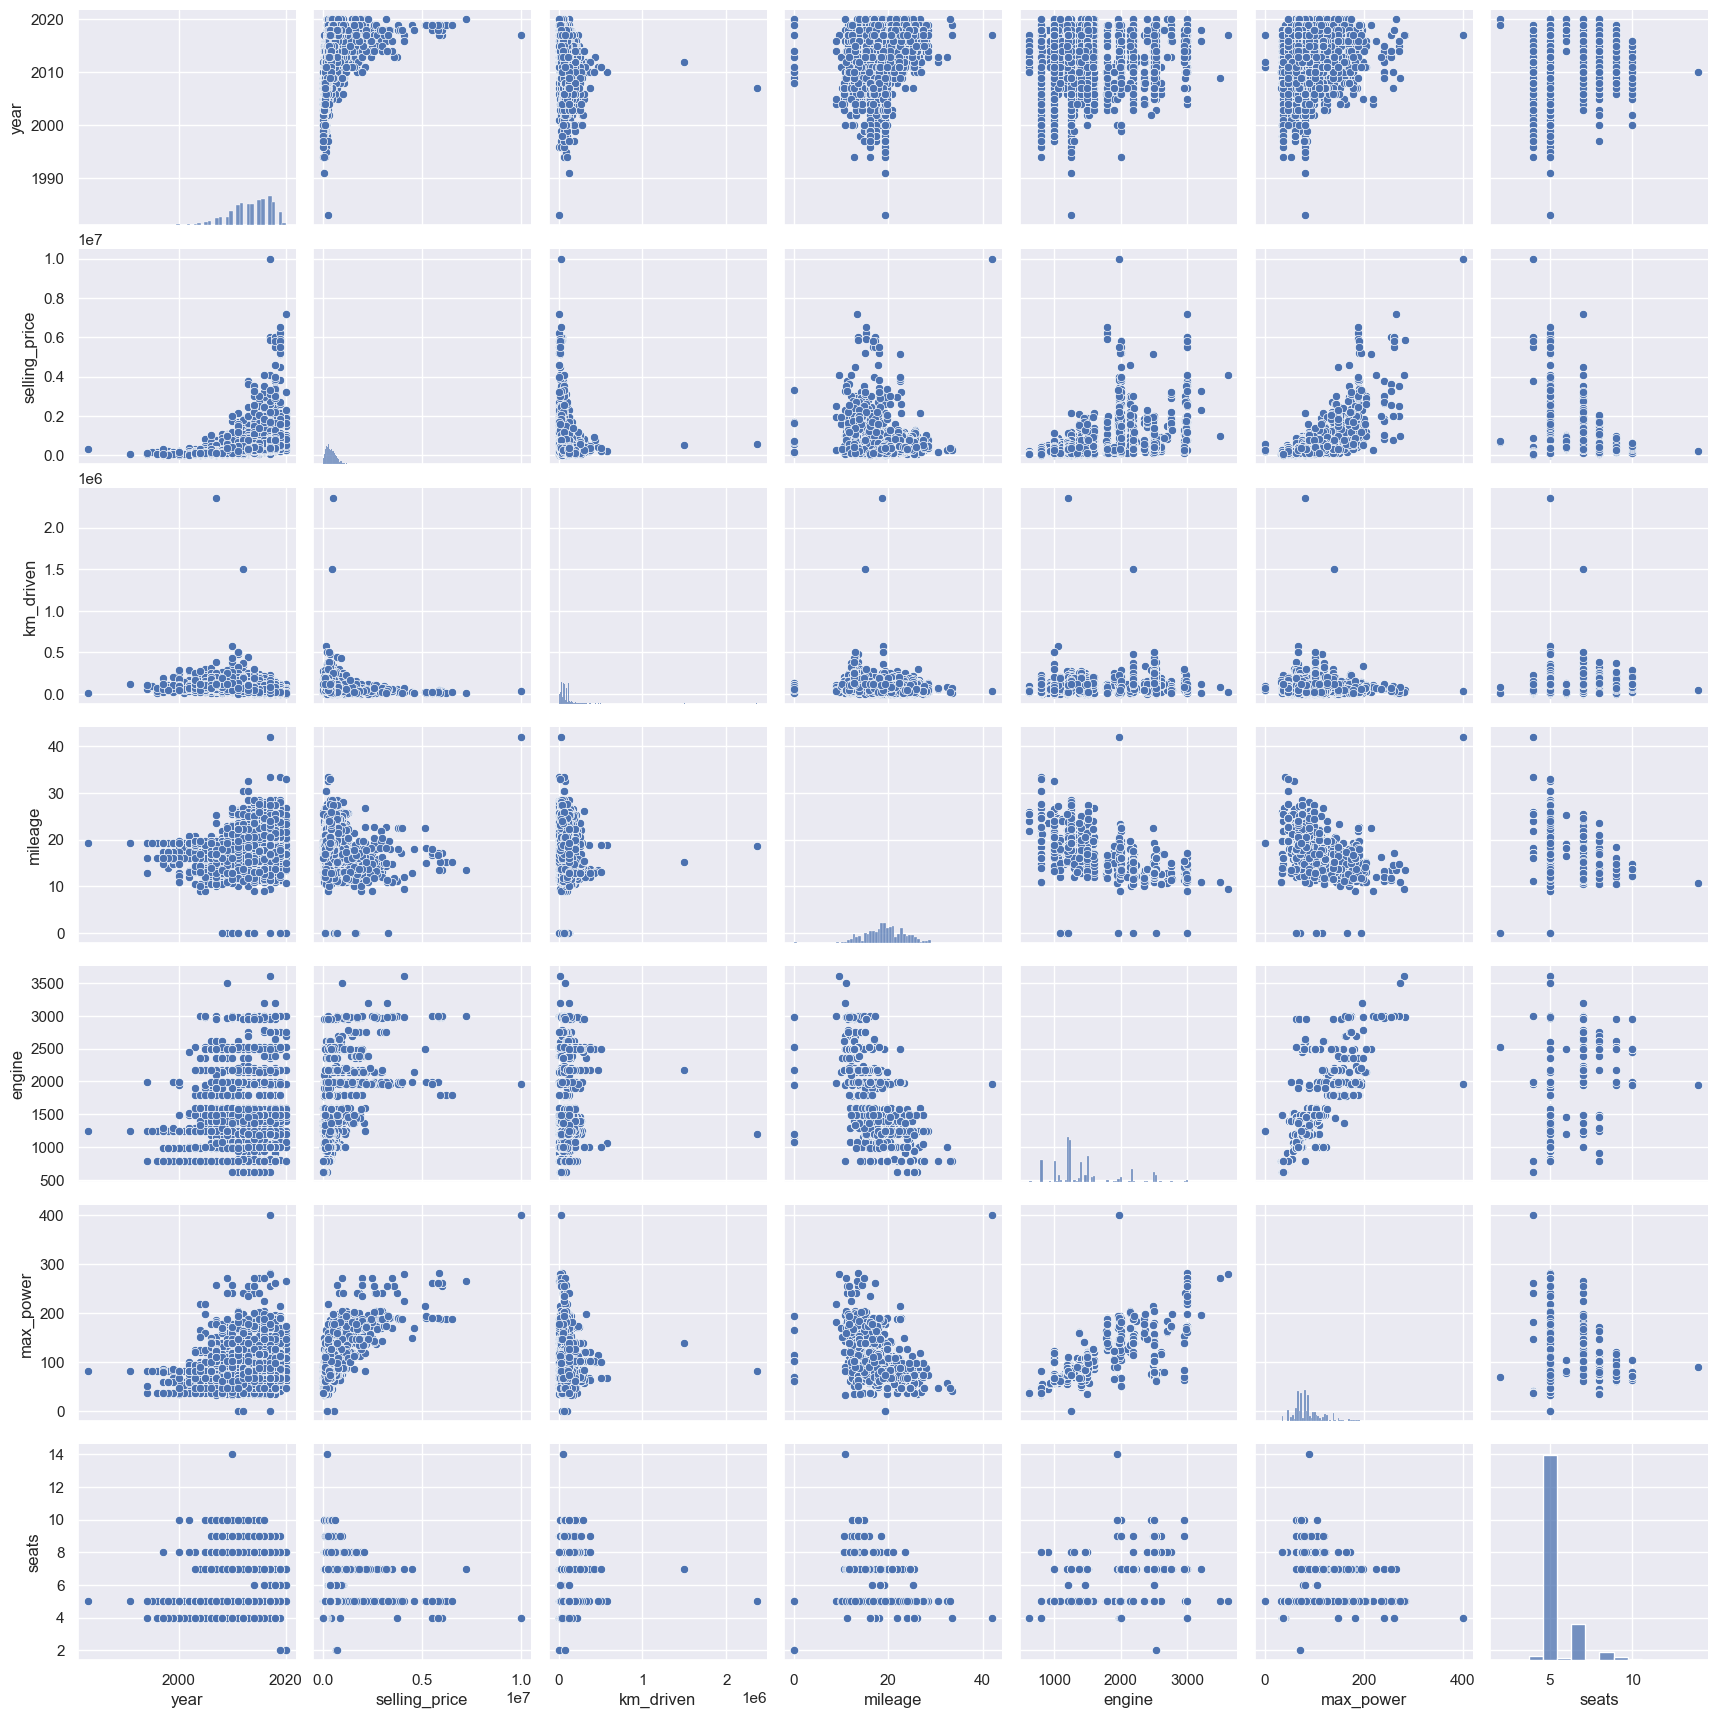

In [204]:
# Строим pairplot для train

sns.pairplot(df_train)

1) По построенным графикам можно предположить наличие связи между целевой переменной (selling_price) и переменными year, engine и max_power, но скорее всего есть связь и есть, она будет относительно слабо выражена.
2) По построенным графикам можно выдвинуть гипотезу о том, что коррелируют engine и max_power, что в целом соответствует здравому смыслу. 

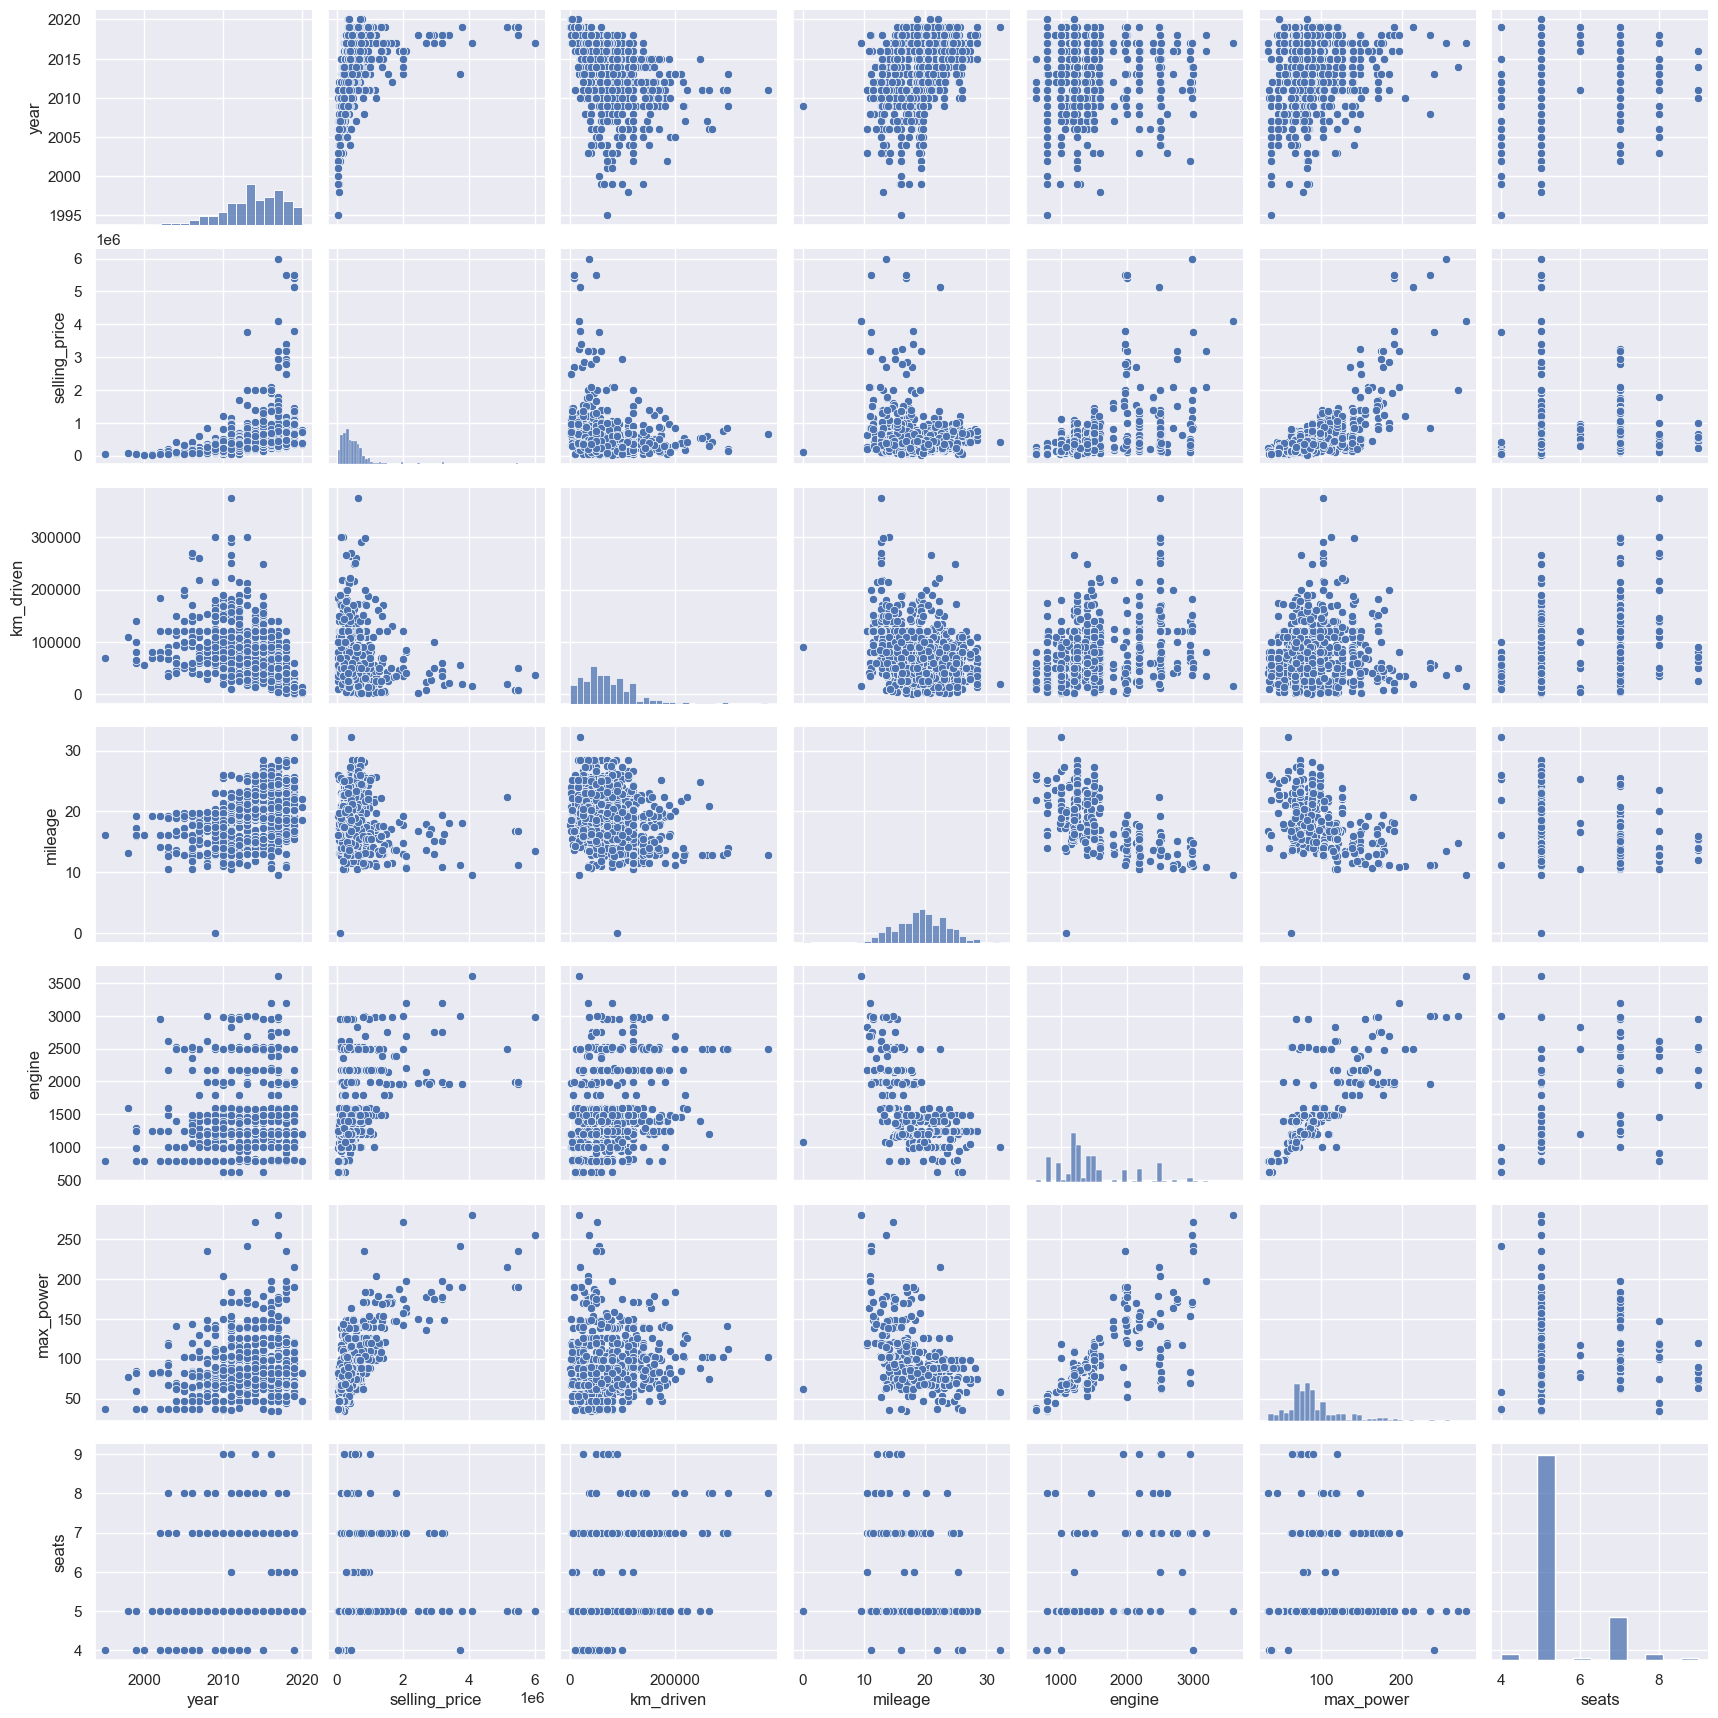

In [205]:
# Построим pairplot для test

sns.pairplot(df_test)

Совокупности распределений в train и в test оказались похожими.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [206]:
# Посмотрим на корреляции в train 

correlations = df_train.select_dtypes(include=['int', 'float']).corr()
correlations

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156648,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692754,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024630,0.192328
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373271,-0.450810
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,0.652172
max_power,0.156648,0.692754,0.024630,-0.373271,0.681082,1.000000,0.244060
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.244060,1.000000


<Axes: >

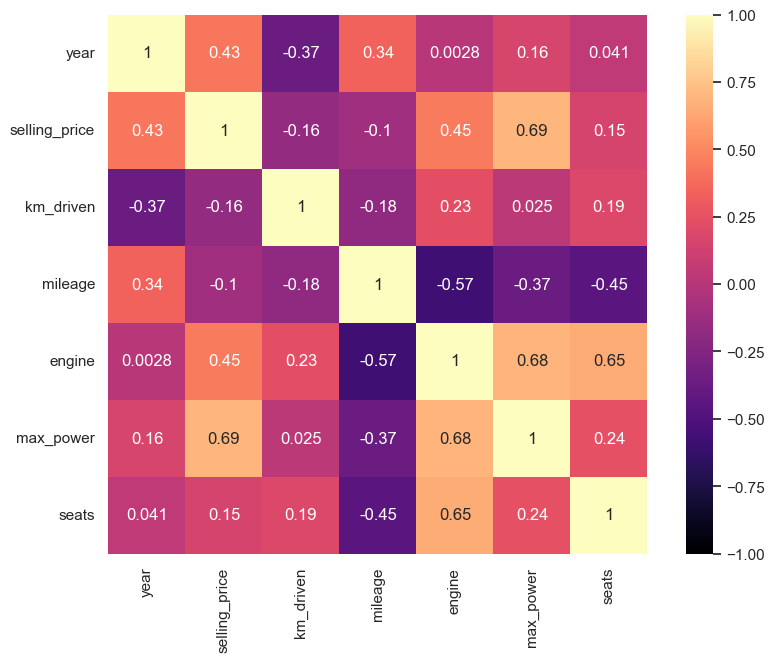

In [207]:
# Построим тепловую карту корреляций
sns.heatmap(correlations, annot=True, square=True, cmap='magma', vmax=1, vmin=-1)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1) Наименее скоррелированы между собой признаки year и engine (коэффициент корреляции 0.0028).
2) Относительно сильная положительная линейная зависимость наблюдается между признаками selling_price и max_power (0.69), engine и max_power (0.68), engine и seats (0.65). В целом я бы не сказал, что при коэффициенте корреляции ниже 0.7 справедливо утверждать, что корреляция сильная, но в контексте данного датасета именно у этих пар признаков наиболее высокий коэффициент корреляции.
3) В целом я бы не стал так утверждать опираясь только на эти данные, так как коэффициент корреляции хоть и отрицательный, но по модулю достаточно низкий (-0.37), то есть по нему можно сказать лишь о слабой обратной связи. Однако нельзя твердо и четко сказать, что это утверждение неправильно, особенно если вооружиться сдравым смыслом.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

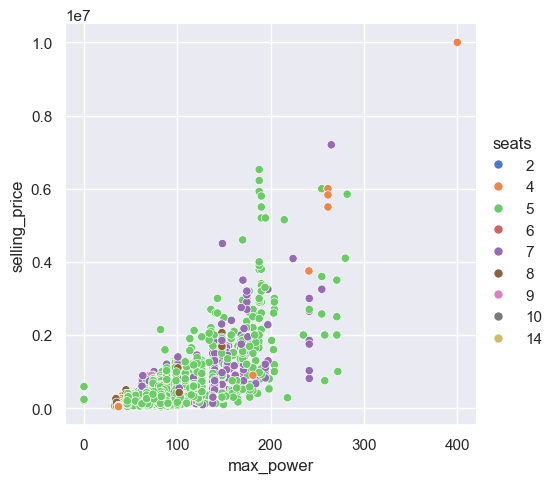

In [208]:
# Ранее мы увидели, что между ценой (selling_price) и мощностью (max_power) автомобиля есть положительная связь, то есть более мощные машины стоят дороже.
# Как правило наибольшую мощность имеют спорткары и суперкары, для которых также характерно небольшое количество посадочных мест (seats), чаще 2.
# Предлагаю проверить эту гипотезу
# Спойлер: гипотеза провалилась, наиболее дорогие машины имеют 4, 5 или 7 мест

sns.relplot(data=df_train, x='max_power', y='selling_price', hue='seats', palette="muted")

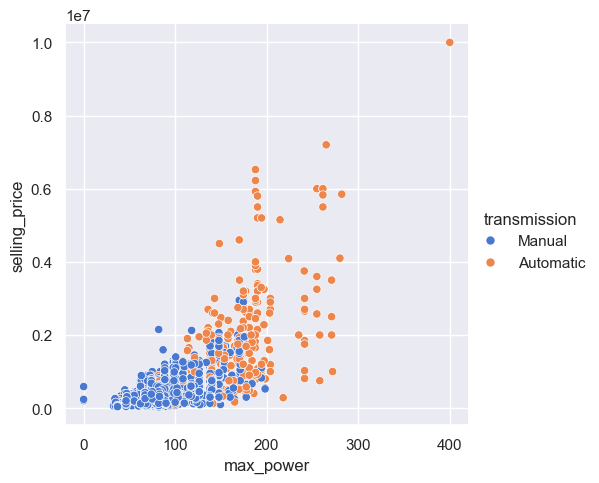

In [209]:
# Проверим аналогичную гипотезу для типа трансмиссии (автоматическая должна чаще встречаться на более мощных и дорогих маштинах)
# Спойлер: так и есть
sns.relplot(data=df_train, x='max_power', y='selling_price', hue='transmission', palette="muted")

<Axes: xlabel='owner', ylabel='selling_price'>

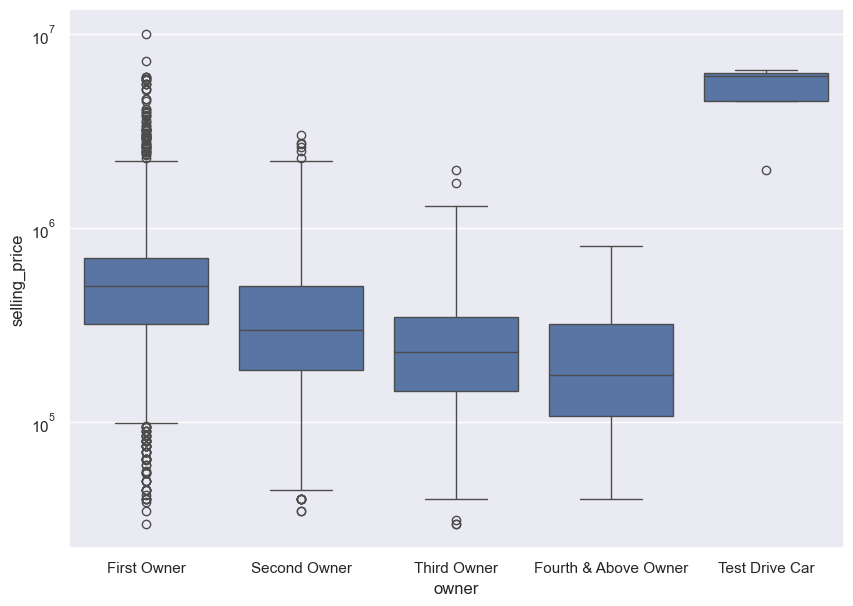

In [210]:
# Гипотеза: чем меньше владельцев было у автомобиля, тем он дороже
# Построим boxplot цены в разрезе количества владельцев
# Спойлер: гипотеза подтвердилась, самые дорогии машины из категории "Test Drive Car", то есть по сути новые, затем идут автомобили с 1 владельцем и так далее

sns.set_theme(rc={'figure.figsize':(10, 7)})
sns.boxplot(data=df_train, x='owner', y='selling_price', log_scale=True)

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [211]:
# Наш набор данных изначально был разбит на train и test

X_train = df_train.select_dtypes(include=['int', 'float']).drop('selling_price', axis='columns').copy()
X_test = df_test.select_dtypes(include=['int', 'float']).drop('selling_price', axis='columns').copy()
y_train = df_train['selling_price'].copy()
y_test = df_test['selling_price'].copy()

In [212]:
assert X_train.shape == (5840, 6)

In [213]:
assert X_test.shape == (1000, 6)

In [214]:
y_train.shape

(5840,)

In [215]:
y_test.shape

(1000,)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred_train = linreg.predict(X_train)
linreg_pred_test = linreg.predict(X_test)

In [217]:
linreg.coef_

array([ 3.73218896e+04, -7.34992383e-01,  7.22111445e+03,  1.25976483e+02,
        1.02026416e+04, -2.36399466e+04])

In [218]:
mse_train = MSE(y_train, linreg_pred_train)
mse_test = MSE(y_test, linreg_pred_test)

r2_train = r2_score(y_train, linreg_pred_train)
r2_test = r2_score(y_test, linreg_pred_test)

print(f'MSE train - {mse_train}\nMSE test - {mse_test}')
print(f'R2 train - {r2_train}\nR2 test - {r2_test}')

MSE train - 116873067751.52184
MSE test - 233297548204.61237
R2 train - 0.5922629595849868
R2 test - 0.5941441219017104


MSE очень высокая даже на трейне, хотя на тесте она выше еще на порядок.  
R2 на тесте почти такой же, как на трейне, но и там и там он низкий.  
Вывод: модель плохо предсказывает целевую переменную как на трейне, так и на тесте.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [219]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.set_output(transform='pandas')
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [220]:
linreg_scaled = LinearRegression()
linreg_scaled.fit(X_train_scaled, y_train)
linreg_scaled_pred_train = linreg_scaled.predict(X_train_scaled)
linreg_scaled_pred_test = linreg_scaled.predict(X_test_scaled) 

In [221]:
mse_train_scaled = MSE(y_train, linreg_scaled_pred_train)
mse_test_scaled = MSE(y_test, linreg_scaled_pred_test)

r2_train_scaled = r2_score(y_train, linreg_scaled_pred_train)
r2_test_scaled = r2_score(y_test, linreg_scaled_pred_test)

print(f'MSE train - {mse_train_scaled}\nMSE test - {mse_test_scaled}')
print(f'R2 train - {r2_train_scaled}\nR2 test - {r2_test_scaled}')

MSE train - 116873067751.52162
MSE test - 233297548204.603
R2 train - 0.5922629595849875
R2 test - 0.5941441219017267


Значения MSE и R2 не изменились, то есть стандартизация не помогла улучшить модель.  
На лекции нам говорили, что для простой линейной регрессии стандартизация данных никак не влияет на точность предсказания, поэтому отсутствие изменений в метриках было вполне ожидаемым результатом.

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [222]:
abs(linreg_scaled.coef_)

array([152843.26235773,  44148.04751104,  28781.08659475,  61176.85714999,
       322779.70323584,  23220.5702262 ])

In [223]:
X_train_scaled.head()

,year,km_driven,mileage,engine,max_power,seats
0,0.139570,1.191152,0.996413,-0.373643,-0.439701,-0.434419
1,0.139570,0.766619,0.429384,0.141162,0.493387,-0.434419
2,-0.837167,0.883158,0.896054,-0.068879,0.066037,-0.434419
3,-1.569719,0.766619,-0.835142,-0.270682,0.009142,-0.434419
4,0.872122,-0.482007,0.178486,-0.478663,-0.191257,-0.434419


Наибольший коэффициент у метрики под номером пять (322779.70323584). Это max_power, которую ранее мы подозревали в наличии связи с целевой переменной.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [224]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train_scaled, y_train)
lasso_scaled_pred_train = lasso_reg.predict(X_train_scaled)
lasso_scaled_pred_test = lasso_reg.predict(X_test_scaled) 

In [225]:
mse_train_scaled_lasso = MSE(y_train, lasso_scaled_pred_train)
mse_test_scaled_lasso = MSE(y_test, lasso_scaled_pred_test)

r2_train_scaled_lasso = r2_score(y_train, lasso_scaled_pred_train)
r2_test_scaled_lasso = r2_score(y_test, lasso_scaled_pred_test)

print(f'MSE train - {mse_train_scaled_lasso}\nMSE test - {mse_test_scaled_lasso}')
print(f'R2 train - {r2_train_scaled_lasso}\nR2 test - {r2_test_scaled_lasso}')

MSE train - 116873067761.63504
MSE test - 233298219170.76022
R2 train - 0.5922629595497046
R2 test - 0.5941429546560312


Применение Lasso регрессии не помогло улучшить качество модели, от обычной регрессии метрики отличаются незначительно:  
- MSE на train огромная и стала больше примерно на 0.1
- MSE на test тоже огромная и стала примерно на 60000
- R2 на train незначительно ухудшился (стал меньше на что-то по типу 3 трилионных)
- R2 на test незначительно ухудшился (стал меньше на что-то по типу 1 десятимиллионную) 

В общем модель все также плохо предсказывает целевую переменную.

p.s. в этом моменте честно говоря я не понял, почему метрики не изменились, как будто с регуляризацией хотелось бы увидеть более существенную разницу. Может быть я где-то ошибся в коде?

In [226]:
lasso_reg.coef_

array([152843.08385345, -44146.91853785,  28779.20408499,  61172.02578008,
       322780.58619708, -23217.69327311])

L1-регуляризация с параметрами по-умолчанию не занулила никакие веса. Более того сами веса в абсолютных значениях практически не изменились, но второй и шестой веса поменяли знак и стали отрицательными.
Я думаю, так произошло потому, что дефолтное значение гиперпараметра альфа (коэффициент регуляризации), равное 1, слишком маленькое относительно размера весов, в следствие чего регуляризация слишком слабо штрафует большие веса. Чтобы подтвердить эту гипотезу я поэкспериментировал с различными значениями гиперпараметра альфа и установил, что зануление хотя бы одно коэффицента происходит начиная с альфа = 8130  

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [227]:
from sklearn.model_selection import GridSearchCV

In [228]:
params = {'alpha': [0.1, 1, 10, 1000, 10000, 100000]}
lasso_reg_gs = Lasso()
gs_lasso_scaled = GridSearchCV(lasso_reg_gs, params, cv=10)
gs_lasso_scaled.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 10, 1000, 10000, 100000]})

In [229]:
gs_lasso_scaled.best_estimator_

Lasso(alpha=10000)

In [230]:
gs_lasso_scaled.best_score_

np.float64(0.5727300261493131)

In [231]:
gs_lasso_scaled.best_estimator_.coef_

array([151898.11359496, -32723.29920873,   9238.17045228,  17841.93520051,
       329198.99021342,     -0.        ])

1) GridSearchCV обучил 6 разных моделей (я передал ему 6 разных значений параметра альфа) по 10 раз каждую (так как было 10 фолдов), получается всего 60 обучений

p.s. тут я не совсем понял, что мы считаем за разные модели: конкретный метод (в данном случае Lasso) с разными параметрами или каждый экземпляр Lasso с одним и тем же параметром, но обученный на своем фолде. В общем могу ответить двумя способами: разных моделей 6 или 60.


2) У лучшей модели коэффициент альфа равен 10000. Занулился вес признака seats.

In [232]:
# Посмотрим на метрики
lasso_scaled_gs_pred_train = gs_lasso_scaled.best_estimator_.predict(X_train_scaled)
lasso_scaled_gs_pred_test = gs_lasso_scaled.best_estimator_.predict(X_test_scaled)

mse_train_scaled_lasso_gs = MSE(y_train, lasso_scaled_gs_pred_train)
mse_test_scaled_lasso_gs = MSE(y_test, lasso_scaled_gs_pred_test)

r2_train_scaled_lasso_gs = r2_score(y_train, lasso_scaled_gs_pred_train)
r2_test_scaled_lasso_gs = r2_score(y_test, lasso_scaled_gs_pred_test)

print(f'MSE train - {mse_train_scaled_lasso_gs}\nMSE test - {mse_test_scaled_lasso_gs}')
print(f'R2 train - {r2_train_scaled_lasso_gs}\nR2 test - {r2_test_scaled_lasso_gs}')

MSE train - 117735529384.66121
MSE test - 240512206991.89523
R2 train - 0.5892540751556382
R2 test - 0.5815931469779442


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [233]:
from sklearn.linear_model import ElasticNet

In [234]:
enet = ElasticNet()
params = {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
gs_enet_scaled = GridSearchCV(enet, params, cv=10, verbose=1)
gs_enet_scaled.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             verbose=1)

In [235]:
gs_enet_scaled.best_estimator_

ElasticNet(alpha=1, l1_ratio=0.9)

In [236]:
gs_enet_scaled.best_score_

np.float64(0.5761378555173832)

In [237]:
gs_enet_scaled.best_estimator_.coef_

array([146041.11461375, -46021.21571588,  22845.76274071,  79237.72636177,
       281536.65815575, -24516.39609253])

1) Я передал в GridSearchCV 7 значений для параметра alpha и 5 значений для параметра l1_ratio, соответственно получилось 35 моделей, каждая из которых обучалась на 10 фолдах, получается в совокупности 350 обучений. 

p.s. тут я также не совсем понимаю, что мы считаем отдельной моделью, как и в предыдущем вопросе. Могу сказать что всего моделей 35 или 350.

2) Лучшей стала моедль с гиперпараметром alpha=1 и гиперпараметром l1_ration=0.9.

In [238]:
# Посмотрим на метрики
enet_scaled_gs_pred_train = gs_enet_scaled.best_estimator_.predict(X_train_scaled)
enet_scaled_gs_pred_test = gs_enet_scaled.best_estimator_.predict(X_test_scaled)

mse_train_scaled_enet_gs = MSE(y_train, enet_scaled_gs_pred_train)
mse_test_scaled_enet_gs = MSE(y_test, enet_scaled_gs_pred_test)

r2_train_scaled_enet_gs = r2_score(y_train, enet_scaled_gs_pred_train)
r2_test_scaled_enet_gs = r2_score(y_test, enet_scaled_gs_pred_test)

print(f'MSE train - {mse_train_scaled_enet_gs}\nMSE test - {mse_test_scaled_enet_gs}')
print(f'R2 train - {r2_train_scaled_enet_gs}\nR2 test - {r2_test_scaled_enet_gs}')

MSE train - 117992231505.21773
MSE test - 245892672007.79794
R2 train - 0.5883585141430148
R2 test - 0.572233025663291


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [239]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis='columns')
X_test_cat = df_test.drop(['name', 'selling_price'], axis='columns')

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [240]:
assert X_train_cat.shape == (5840, 10)

In [241]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [242]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.set_output(transform='pandas')
ohe.fit(X_train_cat[cat_cols])
X_train_cat = pd.concat([X_train_cat, ohe.transform(X_train_cat[cat_cols])], axis='columns').drop(cat_cols, axis='columns')
X_test_cat = pd.concat([X_test_cat, ohe.transform(X_test_cat[cat_cols])], axis='columns').drop(cat_cols, axis='columns')

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [243]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

rig_reg = Ridge()
params = {'alpha': [1, 10, 100, 1000, 10000]}
gs_rig = GridSearchCV(rig_reg, param_grid=params, scoring='r2', refit=True, cv=10)

In [244]:
gs_rig.fit(X_train_cat, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 10, 100, 1000, 10000]}, scoring='r2')

In [245]:
gs_rig.best_estimator_

Ridge(alpha=10)

In [246]:
gs_rig.best_estimator_.coef_

array([ 3.25443330e+04, -5.90554697e-01,  5.80561902e+03,  8.76139502e+01,
        8.73596240e+03, -1.02022278e+04,  1.46377319e+04,  8.37475596e+04,
       -4.53802412e+04, -1.13256155e+05, -1.03810420e+05, -3.04626722e+05,
       -4.41658212e+04, -5.96371344e+04,  9.37499025e+05, -4.74706173e+04])

In [247]:
gs_rig.best_score_

np.float64(0.6030356750736842)

Средняя оценка r2 коэффициента по кросс-валидации в GridSearchCV для лучшей модели улучшилась на 3 сотых (с 0.57 до 0.6)

In [248]:
pred_train_cat = gs_rig.best_estimator_.predict(X_train_cat)
pred_test_cat = gs_rig.best_estimator_.predict(X_test_cat)

mse_train_cat = MSE(y_train, pred_train_cat)
mse_test_cat = MSE(y_test, pred_test_cat)

r2_train_cat = r2_score(y_train, pred_train_cat)
r2_test_cat = r2_score(y_test, pred_test_cat)

print(f'MSE train - {mse_train_cat}\nMSE test - {mse_test_cat}')
print(f'R2 train - {r2_train_cat}\nR2 test - {r2_test_cat}')

MSE train - 104329086276.703
MSE test - 207550670033.712
R2 train - 0.6360253590835383
R2 test - 0.6389346562590443


Обе матрики (MSE и r2_score) улучшились и на тренировочных и на тестовых данных.

**Вывод**: качество прогнозов удалось улучшить.

In [249]:
# Хочу попробовать повторить все на нормализованных данных и посмотреть на разницу в результатах

scaler = StandardScaler()
scaler.set_output(transform='pandas')
scaler.fit(X_train_cat)
X_train_cat_scaled = scaler.transform(X_train_cat)
X_test_cat_scaled = scaler.transform(X_test_cat)

In [250]:
rig_reg_scaled = Ridge()
params = {'alpha': [1, 10, 100, 1000, 10000]}
gs_rig_scaled = GridSearchCV(rig_reg_scaled, param_grid=params, scoring='r2', refit=True, cv=10)
gs_rig_scaled.fit(X_train_cat_scaled, y_train)
gs_rig_scaled.best_score_

np.float64(0.6047263409700481)

Средний r2 коэффициент по кросс-валидации в GridSearchCV вырос 1 тысячную.

In [251]:
gs_rig_scaled.best_estimator_

Ridge(alpha=1000)

In [252]:
gs_rig_scaled.best_estimator_.coef_

array([119032.428531  , -38012.01338454,  13510.08501153,  62466.81397011,
       215810.11249606, -12217.34437543,  19994.01279131,   5092.52050899,
       -19532.07864563, -35258.50605219,  -6562.45996371, -89782.14403865,
       -10043.02764444, -29385.76032993,  76718.95418952, -16733.50361822])

Лучший альфа подобрался другой.

In [253]:
pred_train_cat_scaled = gs_rig_scaled.best_estimator_.predict(X_train_cat_scaled)
pred_test_cat_scaled = gs_rig_scaled.best_estimator_.predict(X_test_cat_scaled)

mse_train_cat_scaled = MSE(y_train, pred_train_cat_scaled)
mse_test_cat_scaled = MSE(y_test, pred_test_cat_scaled)

r2_train_cat_scaled = r2_score(y_train, pred_train_cat_scaled)
r2_test_cat_scaled = r2_score(y_test, pred_test_cat_scaled)

print(f'MSE train - {mse_train_cat_scaled}\nMSE test - {mse_test_cat_scaled}')
print(f'R2 train - {r2_train_cat_scaled}\nR2 test - {r2_test_cat_scaled}')

MSE train - 102618908465.54906
MSE test - 230961738812.60727
R2 train - 0.641991685224526
R2 test - 0.598207610691704


На трайне метрики улучшились, но на тесте наоборот ухудшились после масштабирования данных.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [254]:
def business_metric(y_true, y_pred):
    cnt_ten_percent_error = 0
    for t, p in zip(y_true, y_pred):
        error = abs(t - p) / t
        if error <= 0.1:
            cnt_ten_percent_error += 1
    
    return cnt_ten_percent_error / len(y_true)

In [255]:
# Предсказания всех моделей на тестовой выборке уже были посчитаны выше по ходу этого ноутбука. 
# Предлагаю использовать их вместо того, чтобы гонять модели еще раз.

models_predictions = {'LinearRegression': linreg_pred_test, 'LinearRegression with scaled data': linreg_scaled_pred_test,
                      'LassoRegression with scaled data': lasso_scaled_pred_test, 
                      'LassoRegression with scaled data and GridSearchCV': lasso_scaled_gs_pred_test,
                      'ElasticNet with scaled data and GridSearchCV': enet_scaled_gs_pred_test,
                      'Ridge with categorial data and GridSearchCV': pred_test_cat,
                      'Ridge with scaled categorial data and GridSearchCV': pred_test_cat_scaled}

In [256]:
business_result = []
for key, prediction in models_predictions.items():
    business_result.append((key, business_metric(y_test, prediction)))
    
print(*[f'{k} - {v}' for k, v in sorted(business_result, key=lambda x: x[1], reverse=True)], sep='\n')

Ridge with scaled categorial data and GridSearchCV - 0.255
ElasticNet with scaled data and GridSearchCV - 0.241
LassoRegression with scaled data and GridSearchCV - 0.235
Ridge with categorial data and GridSearchCV - 0.233
LinearRegression - 0.227
LinearRegression with scaled data - 0.227
LassoRegression with scaled data - 0.227


Лучше всего решает задачи бизнеса модель Ridge регрессии, обученная на масштабированных числовых и категориальных данных, гиперпараметр альфа для которой был подобран при помощи GridSearchCV (с использорванием r2_score) с кросс-валидацией на 10 фолдах.

# Соберем пайплайн с лучшей моделью

In [257]:
X_train = df_train.drop(['name', 'selling_price'], axis='columns').copy()
X_test = df_test.drop(['name', 'selling_price'], axis='columns').copy()
y_train = df_train['selling_price'].copy()
y_test = df_test['selling_price'].copy()

In [258]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']
all_cols = X_train.columns

cat_cols_encoder = Pipeline([('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))])
# all_cols_scaler = Pipeline(['scaler', StandardScaler()])

column_transformer = ColumnTransformer([('categorial', cat_cols_encoder, cat_cols)], remainder='passthrough')

column_scaler = Pipeline([('scaler', StandardScaler())])

regressor = Pipeline([
    ('categorial_encoder', column_transformer),
    ('all_scaler', column_scaler),
    ('regressor', Ridge(alpha=1000))
    ])

regressor.fit(X_train, y_train)

/Users/sergey_sysoev/Projects/ml_homeworks/env/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('categorial_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorial',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['fuel', 'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('all_scaler', Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', Ridge(alpha=1000))])

In [259]:
pred_train = regressor.predict(X_train)
pred_test = regressor.predict(X_test)

mse_train = MSE(y_train, pred_train)
mse_test = MSE(y_test, pred_test)

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

print(f'MSE train - {mse_train}\nMSE test - {mse_test}')
print(f'R2 train - {r2_train}\nR2 test - {r2_test}')


MSE train - 102618908465.54915
MSE test - 230961738812.60757
R2 train - 0.6419916852245258
R2 test - 0.5982076106917036


In [260]:
# Сохраним лучшую модель в .pickle файл
import joblib
joblib.dump(regressor, 'model.pickle')

['model.pickle']

In [261]:
# Проверка
joblib.load('model.pickle')

Pipeline(steps=[('categorial_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorial',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['fuel', 'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('all_scaler', Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', Ridge(alpha=1000))])

In [262]:
joblib.dump(X_test, 'X_test.pickle')
joblib.dump(y_test, 'y_test.pickle')

['y_test.pickle']

In [266]:
X_test.head(1).to_json()

'{"year":{"0":2010},"km_driven":{"0":168000},"fuel":{"0":"Diesel"},"seller_type":{"0":"Individual"},"transmission":{"0":"Manual"},"owner":{"0":"First Owner"},"mileage":{"0":14.0},"engine":{"0":2498},"max_power":{"0":112.0},"seats":{"0":7}}'

# Текст файла readme.md

# Домашнее задание №1 (базовая группа)
##### Применение линейной регрессии для предсказания стоимости автомобилей.
Задание выполнил студент магистратуры ВШЭ "Искусственный интеллект" Сысоев Сергей Александрович.

## Характеристика данных

Набор данных состоял из 7999 строк (6999 в тренировочном датасете и 1000 в тестовом датасете) и 13 столбцов:

- name - название модели автомобиля
- year - год выпуска
- selling_price - стоимость (целевая переменная)
- km_driven - пробег
- fuel - тип топлива
- seller_type - тип продавца
- transmission - тип коробки передач
- owner - порядковый номер текущего владельца
- mileage - расход топлива?
- engine - объем двигателя
- max_power - можность двигателя
- torque - крутящий момент двигателя
- seats - количество посадочных мест

### Пропуски в данных
Обнаруженные пропущенные значения в тренировочном датасете:
- В столбце "mileage" находится 202 пропущенных значений 
- В столбце "engine" находится 202 пропущенных значений 
- В столбце "max_power" находится 196 пропущенных значений 
- В столбце "torque" находится 203 пропущенных значений В столбце "seats" находится 202 пропущенных значений

Обнаруженные пропущенные значения в тестовом датасете:
- В столбце "mileage" находится 19 пропущенных значений 
- В столбце "engine" находится 19 пропущенных значений 
- В столбце "max_power" находится 19 пропущенных значений 
- В столбце "torque" находится 19 пропущенных значений 
- В столбце "seats" находится 19 пропущенных значений

Столбец torque был удален. Из значений в столбцах mileage, engine и max_power были удалены единицы измерения, затем значения были конвертированы в тип данных float. Все пропущенные значения были заменены медианами соответствующего признака. Данное преобразование было выполнено как в тренировочном, так и в тестово датасете.

### Дублирующие значения
В тренировочном датасете обнаружено 985 дублирующихся строчек, а в тестовом - 62 дублирующие строчки.  
Без учета целевой переменной в тренировочном датасете обнаружено 1159 дублирующихся строк. Дублирующие строки в тренировочном датасете были удалены.




## EDA
### Описательные статистики
Числовые данные:
В обоих датасетах (тренировочный и тестовый) были автомобили в среднем 2013 года выпуска, средний mileage составил около 19, среднее количество посадочных мест составило 5. При этом в тестовом датасете были выше средняя цена автомобиля (617901 против 535432 в тренировочном), объем двигателя (1454 против 1429 в тренировочном датасете), и максимальная мощность (примерно 91 против примерно 88). В тренировочном датасете оказался выше средний пробег автомобиля (73952 против 71393 в тестовом).

Категориальные данные:
В тренировочном датасете было 1924 уникальных моделей автомобилей (и наиболее часто встречающаяся Maruti Alto 800 LXI), когда в тестовом только 621 (и наиболее часто встречающаяся Maruti Alto 800 LXI). Признаки fuel, seller_type, transmission, owner, были схожи образом в обоих датасетах: в fuel 4 категории и наиболее часто встречающаяся Diesel, в seller_type 3 категории и Individual, в transmission 2 категории и Manual, в owner 5 категорий и First Owner.

Совокупности распределения признаков в тренировочном и тестовом датасетах схожи.

### Связь между признаками
Признаки engine и max_power, положительно коррелируют между собой (коэффициент корреляции 0.68), что логично, так как за увеличением объема двигателя обычно следует увеличение его мощности. Также положительно коррелируют признаки engine и seats (коэффициент корреляции 0.65).
Признак max_power положительно коррелирует с целевой переменной (коэффициент корреляции 0.69).

### Дополнительные иснайды
- Автоматический тип трансмиссии характерен для более дорогих автомобилей
- Чем меньше владельцев было у автомобиля, тем выше медианная стоимость. Самую высокую стоимость демонстрируют автомобили из категории Test Drive Car.





## Обучение моделей
В ходе выполнения задания было построено несколько моделей линейной регрессии:
1) Линейная регрессия на числовых признаках
2) Линейная регрессия на масштабированных числовых признаках
3) Lasso регрессия на масштабированных числовых признаках
4) Lasso регрессия на масштабированных числовых признаках и подобранном гиперпараметре alpha кросс-валидацией на 10 фолдах при помощи GridSearchCV
5) ElasticNet регрессиия на масштабированных числовых признаках и подобранными гиперпараметрами alpha и l1-ratio кросс-валидацией на 10 фолдах при помощи GridSearchCV
6) Ridge регрессия на числовых и категориальных (закодированы при помощи OHE) признаках и подобранном гиперпараметре alpha кросс-валидацией на 10 фолдах при помощи GridSearchCV
7) Ridge регрессия на масштабированных числовых и категориальных (закодированы при помощи OHE) признаках и подобранном гиперпараметре alpha кросс-валидацией на 10 фолдах при помощи GridSearchCV

##### Линейная регрессия на числовых признаках
В качестве базовой самой простой модели была обучена классическая линейная регрессия (LinearRegression) на датасете, который состоял только из числовых признаков. В результате MSE составил 233297548204.61237, а коэффициент r2 составил 0.594. Качество этой модели оказалось низким, она плохо предсказывает целевую переменную (высокий MSE, низкий r2).


##### Линейная регрессия на масштабированных числовых признаках
Для улучшения качества базовой модели было выполнено масштабирование признаков при помощи StandardScaler, обученного на тестовой выборке. Однако это не дало прирост качества модели, значения MSE и r2 не изменились (так как масштабирование признаков не влияет на точность классической линейной регрессии). Тем не менее, масштабирование признаков открыло возможность для интерпретации важности признаков модели. Наиболее высоким оказался вес признака max_power, а значит он наиболее важен для прогнозирования целевой переменной.


##### Lasso регрессия на масштабированных числовых признаках
Затем на все тех же масштабированных данных была обучена Lasso регрессия с параметрами по-умолчанию. Данная модель не улучшила точность прогнозирования целевой переменной, метрики MSE и коэффициент r2 изменились незначительно (MSE вырос на 60000, r2 понизился на 1 десятимиллионную).


##### Lasso регрессия на масштабированных числовых признаках и подобранном гиперпараметре alpha кросс-валидацией на 10 фолдах при помощи GridSearchCV
Для повышения качества предыдущей модели необходимо подобрать оптимальные значения гиперпараметра alpha. Для этого Lasso регрессия была обернута в GridSearchCV, в которой гиперпараметр подбирался при помощи кросс-валидации на 10 фолдах. В результате подобрано оптимальное значение alpha 10000. Затем для лучшей модели из GridSearchCV были рассчитаны метрики качества на тестовой выборке, MSE составил 240512206991.89523, r2 составил 0.582. Таким образом эта модель оказалась хуже классической линейной регрессии, так как значение MSE выросло, а значение коэффициента r2 понизилось.


##### ElasticNet регрессиия на масштабированных числовых признаках и подобранными гиперпараметрами alpha и l1-ratio кросс-валидацией на 10 фолдах при помощи GridSearchCV
Далее была обучена ElasticNet регрессия, гиперпараметры (alpha, l1-ratio) к которой были также подобраны на 10 фолдах при помощи GridSearchCV. Оптимальные значения были подобраны следующие: alpha=1, l1_ratio=0.9. Затем для лучшей модели из GridSearchCV были рассчитаны метрики качества на тестовой выборке, MSE составил 245892672007.79794, коэффициент r2 составил 0.572. Таким образом, эта модель оказалась хуже предыдущей и хуже классической линейной регрессии, так как значение MSE выросло, а значение коэффициента r2 понизилось.


##### Ridge регрессия на числовых и категориальных (закодированы при помощи OHE) признаках и подобранном гиперпараметре alpha кросс-валидацией на 10 фолдах при помощи GridSearchCV
Для улучшения качества модели к числовым данным были добавлены категориальны, которые предварительно были закодированы при помощи OneHotEncoder. Гиперпараметр alpha был подобран кросс-валидацией на 10 фолдах при помощи GridSearchCV, оптимальное значение составило 10. Затем для лучшей модели из GridSearchCV были рассчитаны метрики качества на тестовой выборке, MSE составил 207550670033.712, коэффициент r2 составил 0.639. Таким образом, эта модель оказалась лучше всех предыдущих, на ней MSE снизился, а коэффициент r2 наоборот вырос. Но стоит отметить, что само по себе качество этой модели остается достаточно низким.


##### Ridge регрессия на масштабированных числовых и категориальных (закодированы при помощи OHE) признаках и подобранном гиперпараметре alpha кросс-валидацией на 10 фолдах при помощи GridSearchCV
Для улучшения качества предыдущей модели все данные были масштабированы при помощи StandardScaler. Затем был подобран гиперпараметр alpha с помощью кросс-валидации на 10 фолдах (GridSearchCV), оптимальное значение alpha составило 1000. Затем для лучшей модели из GridSearchCV были рассчитаны метрики качества на тестовой выборке, MSE составил 230961738812.60727, коэффициент r2 составил 0.598. После масштабирования признаков качество модели ухудшилось, но она оказалась чуть лучше модели на классической линейной регрессии.


### Оценка бизнес-метрики
Для дополнительной оценки качества всех обученных моделей использовалась следующая бизнес-метрика: доля прогнозов, отличающихся от реальных цен не более чем на 10%.
По оценке данной бизнес-метрики лучшей оказалась последняя модель (Ridge регрессия на всех масштабированных данных), со значением метрики 0.255, а лучшая модель по значениям метрик MSE и коэффициента r2 оказалась лишь на 4 месте со значением бизнес-метрики 0.233.



### Заключение
По расчетам метрик MSE и коэффициента r2 лучшей оказалась модель 6 (Ridge регрессия на числовых и категориальных (закодированы при помощи OHE) признаках и подобранном гиперпараметре alpha кросс-валидацией на 10 фолдах при помощи GridSearchCV), а по значению бизнес-метрики - модель 7 (Ridge регрессия на масштабированных числовых и категориальных (закодированы при помощи OHE) признаках и подобранном гиперпараметре alpha кросс-валидацией на 10 фолдах при помощи GridSearchCV).
Наибольший прирост в качестве дало использование всего набора признаков, в том числе закодированных OHE категориальных переменных.
Не получилось улучшить качество модели при помощи масштабирования данных и использования Lasso и ElasticNet регрессий.